In [89]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import plotly.express as px

In [90]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Linear regression  

## Definition
Suppose $y = Xw + e$ and $Loss = \sum (y_i - yhat_i)^2 = \sum (y_i - Xw)^2$ 
## Assumptions

1. y is continuous.
2. Linear relationship between X and y.
3. Residual will follow normal distribution.
4. Expalatory variables are independent and identically distributed

## Learning approach
Parameter $w$ can be obtained by following ways.

2. Gradient descent  
Update each parameter $w = {w_1, w_2, ... w_k}$ as $w_i := w_i - \alpha \frac{\partial}{\partial w_i}(Loss)$ iteratively in order to get optimal $w_i$

$$
\frac{\partial}{\partial w_1}Loss = \frac{\partial}{\partial w_1}\sum (y_i - Xw)^2 \\
= \frac{\partial}{\partial w_1}\sum (y_i^2 - 2y_iXw + (Xw)^2) \\
= \frac{\partial}{\partial Xw}\sum (y_i^2 - 2y_iXw + (Xw)^2) * \frac{\partial}{\partial w_1}Xw  \\
= \sum(-2y_i + 2Xw) * x_1  \\
\therefore  \\
w_1 := w_1 - \alpha \sum-2x_1(y_i - Xw)
$$

Python Code

In [101]:
class my_LinearRegression():
    def __init__(self, learning_rate, max_iterations):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        
    def set_parameter(self, X, y, is_add_constant):
        if is_add_constant:
            X = np.concatenate((np.ones(shape=y.shape[0]), X), 1)
        self.W = np.zeros(X.shape[1])
        self.X = X
        self.y = y 
    
    def fit(self, X, y, is_add_constant=False):
        self.set_parameter(X, y, is_add_constant)
        for _ in range(self.max_iterations):
            self.update_coefficient()
    
    def update_coefficient(self):
        yhat = self.predict(self.X)
        for idx, w_pt in enumerate(self.W):
            self.W[idx] = self.W[idx] - self.learning_rate / len(self.X) * 2 * (np.sum((yhat - self.y) * self.X[:,idx]))
    
    def predict(self, X):
        return X.dot(self.W)


In [106]:
df['CONSTANT'] = 1 # add constant for intercept
feat_cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
             'DIS','RAD','TAX','PTRATIO','B','LSTAT', 'CONSTANT']
y = df['PRICE'].values
X = df[feat_cols].values
my_lr = my_LinearRegression(learning_rate=0.000001, max_iterations=100000)
my_lr.fit(X, y)


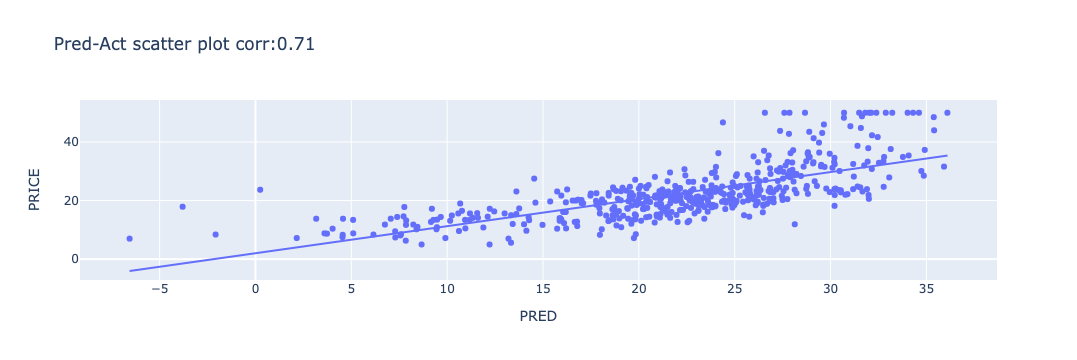

In [107]:
df['PRED'] = my_lr.predict(X)
corr = df[['PRED','PRICE']].corr()['PRICE']['PRED'].round(2)
px.scatter(df, x='PRED', y='PRICE', trendline="ols", title='Pred-Act scatter plot corr:{}'.format(corr))

# Pros and cons 

* Pros
    - Computationaly cheaper than calculus (Able to process huge data)
* Cons
    - Parameter-dependent, possibly suboptimal solution
